In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(7.182167411037739, -27.16197947500754),
 (-70.90541166126648, -162.2393416855177),
 (69.4462723305524, -63.1629823648117),
 (2.607362392942022, -98.34410938490616),
 (44.79147391272741, 42.89804928944221),
 (20.48171592768844, -9.176042400843158),
 (-12.849061460018433, 111.89350498908618),
 (17.47366392846837, -63.25926102542107),
 (79.45860844736748, 3.7844826369071995),
 (57.723408385781596, -92.19102628461948),
 (58.11666239677325, 24.259057855088145),
 (-31.864331234491353, -34.92239886881583),
 (-82.68018675934967, 17.286599065799862),
 (1.0089287154930133, -54.64308801319376),
 (-86.30134905123685, 154.51069113520606),
 (45.667475165430005, 79.72215234820601),
 (36.13140674815514, 49.61852806351979),
 (7.532835238819629, 133.4902582948647),
 (67.41697543327797, -5.122241134595953),
 (70.85656777611231, -111.7559165790503),
 (19.12133439303271, -58.312156927746955),
 (-25.017692358631265, -159.2138303037353),
 (-10.097827118821854, 146.93464492573816),
 (-64.42466066395839, 178

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config_copy import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf9742c1fab1f381700e6d807d265c77


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao filipe
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | pangnirtung
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | severnoye
Processing Record 6 of Set 1 | atar
Processing Record 7 of Set 1 | kanigoro
Processing Record 8 of Set 1 | oranjestad
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | haademeeste
City not found. Skipping...
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | alenquer
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | sarkand
Processing Record 17 of Set 1 | takestan
Processing Record 18 of Set 1 | kloulklubed
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | codrington
Proces

Processing Record 35 of Set 4 | aquidauana
Processing Record 36 of Set 4 | jerez
Processing Record 37 of Set 4 | dubbo
Processing Record 38 of Set 4 | vestmannaeyjar
Processing Record 39 of Set 4 | batagay
Processing Record 40 of Set 4 | camacha
Processing Record 41 of Set 4 | bethel
Processing Record 42 of Set 4 | katsuura
Processing Record 43 of Set 4 | taoudenni
Processing Record 44 of Set 4 | angoram
Processing Record 45 of Set 4 | grootfontein
Processing Record 46 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 4 | mrirt
City not found. Skipping...
Processing Record 48 of Set 4 | pevek
Processing Record 49 of Set 4 | jiroft
City not found. Skipping...
Processing Record 50 of Set 4 | ayan
Processing Record 1 of Set 5 | touros
Processing Record 2 of Set 5 | georgetown
Processing Record 3 of Set 5 | nabire
Processing Record 4 of Set 5 | bassar
Processing Record 5 of Set 5 | ziarat
Processing Record 6 of Set 5 | torit
Processing Record 7 of Set 5 | bam

Processing Record 28 of Set 8 | maharajganj
Processing Record 29 of Set 8 | kaman
Processing Record 30 of Set 8 | lakes entrance
Processing Record 31 of Set 8 | nguiu
City not found. Skipping...
Processing Record 32 of Set 8 | abu samrah
Processing Record 33 of Set 8 | sargatskoye
Processing Record 34 of Set 8 | moroni
Processing Record 35 of Set 8 | joshimath
Processing Record 36 of Set 8 | havre-saint-pierre
Processing Record 37 of Set 8 | ulladulla
Processing Record 38 of Set 8 | badvel
Processing Record 39 of Set 8 | vurnary
Processing Record 40 of Set 8 | guerrero negro
Processing Record 41 of Set 8 | zhezkazgan
Processing Record 42 of Set 8 | faanui
Processing Record 43 of Set 8 | saskylakh
Processing Record 44 of Set 8 | te anau
Processing Record 45 of Set 8 | nishihara
Processing Record 46 of Set 8 | makubetsu
Processing Record 47 of Set 8 | fort wellington
Processing Record 48 of Set 8 | shakiso
Processing Record 49 of Set 8 | chatellerault
Processing Record 50 of Set 8 | tong

Processing Record 24 of Set 12 | savannah bight
Processing Record 25 of Set 12 | roald
Processing Record 26 of Set 12 | quelimane
Processing Record 27 of Set 12 | tabas
Processing Record 28 of Set 12 | severnyy
Processing Record 29 of Set 12 | dunmore town
Processing Record 30 of Set 12 | grudziadz
Processing Record 31 of Set 12 | yenagoa
Processing Record 32 of Set 12 | erzin
Processing Record 33 of Set 12 | phalaborwa
Processing Record 34 of Set 12 | warqla
City not found. Skipping...
Processing Record 35 of Set 12 | znamenskoye
Processing Record 36 of Set 12 | edgewater
Processing Record 37 of Set 12 | deputatskiy
Processing Record 38 of Set 12 | tondano
Processing Record 39 of Set 12 | kainantu
Processing Record 40 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 12 | kysyl-syr
Processing Record 42 of Set 12 | tingo maria
Processing Record 43 of Set 12 | mana
Processing Record 44 of Set 12 | tsaratanana
Processing Record 45 of Set 12 | cock

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.90,-24.50,81.32,59,100,15.28,CV,2020-10-31 00:32:46
1,Mataura,-46.19,168.86,54.00,98,100,13.00,NZ,2020-10-31 00:32:46
2,Pangnirtung,66.15,-65.71,8.55,79,78,3.40,CA,2020-10-31 00:32:46
3,Puerto Ayora,-0.74,-90.35,70.00,92,65,3.00,EC,2020-10-31 00:28:40
4,Severnoye,56.35,78.36,33.31,97,100,7.72,RU,2020-10-31 00:32:46
5,Atar,20.52,-13.05,82.89,16,10,7.99,MR,2020-10-31 00:32:09
6,Kanigoro,-8.13,112.22,81.28,72,89,5.93,ID,2020-10-31 00:32:47
7,Oranjestad,12.52,-70.03,82.40,83,40,9.17,AW,2020-10-31 00:30:50
8,Thompson,55.74,-97.86,19.40,67,90,5.82,CA,2020-10-31 00:32:47
9,Arraial Do Cabo,-22.97,-42.03,70.47,88,100,32.44,BR,2020-10-31 00:32:48


In [34]:
#Reorder columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]


In [35]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2020-10-31 00:32:46,14.90,-24.50,81.32,59,100,15.28
1,Mataura,NZ,2020-10-31 00:32:46,-46.19,168.86,54.00,98,100,13.00
2,Pangnirtung,CA,2020-10-31 00:32:46,66.15,-65.71,8.55,79,78,3.40
3,Puerto Ayora,EC,2020-10-31 00:28:40,-0.74,-90.35,70.00,92,65,3.00
4,Severnoye,RU,2020-10-31 00:32:46,56.35,78.36,33.31,97,100,7.72
...,...,...,...,...,...,...,...,...,...
577,Bilokurakyne,UA,2020-10-31 00:33:34,49.53,38.73,48.72,94,100,3.98
578,Arak,IR,2020-10-31 00:31:52,34.09,49.69,42.78,62,20,1.07
579,Zarand,IR,2020-10-31 00:33:34,30.81,56.56,40.39,67,0,0.89
580,Fortuna Foothills,US,2020-10-31 00:33:34,32.66,-114.41,91.40,13,1,5.82


In [36]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [41]:
# Add Matplotlib inline magic command
%matplotlib inline

# Import the time module.
import time
# Get today's date.
today = time.strftime("%x")
today

'10/30/20'

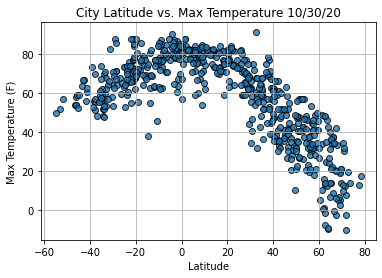

In [43]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

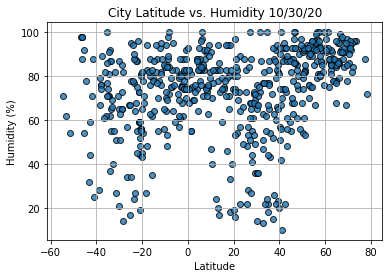

In [45]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

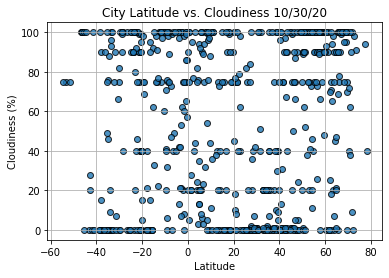

In [46]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

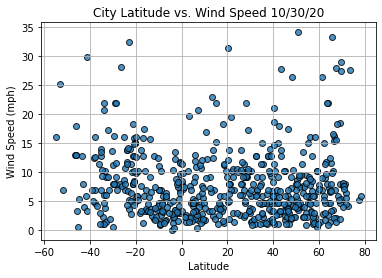

In [47]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [49]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [50]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [52]:
index13 = city_data_df.loc[13]
index13

City                      Sarkand
Country                        KZ
Date          2020-10-31 00:32:48
Lat                         45.41
Lng                         79.92
Max Temp                    37.47
Humidity                       68
Cloudiness                     20
Wind Speed                   1.68
Name: 13, dtype: object

In [53]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2020-10-31 00:32:46,14.90,-24.50,81.32,59,100,15.28
2,Pangnirtung,CA,2020-10-31 00:32:46,66.15,-65.71,8.55,79,78,3.40
4,Severnoye,RU,2020-10-31 00:32:46,56.35,78.36,33.31,97,100,7.72
5,Atar,MR,2020-10-31 00:32:09,20.52,-13.05,82.89,16,10,7.99
7,Oranjestad,AW,2020-10-31 00:30:50,12.52,-70.03,82.40,83,40,9.17
...,...,...,...,...,...,...,...,...,...
577,Bilokurakyne,UA,2020-10-31 00:33:34,49.53,38.73,48.72,94,100,3.98
578,Arak,IR,2020-10-31 00:31:52,34.09,49.69,42.78,62,20,1.07
579,Zarand,IR,2020-10-31 00:33:34,30.81,56.56,40.39,67,0,0.89
580,Fortuna Foothills,US,2020-10-31 00:33:34,32.66,-114.41,91.40,13,1,5.82


In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

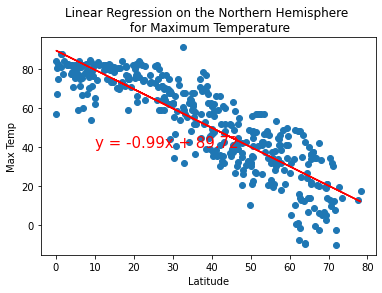

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title("Linear Regression on the Northern Hemisphere \n for Maximum Temperature")
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(10,40))


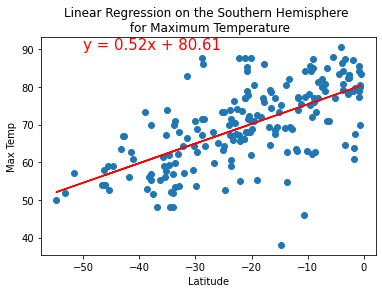

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title('Linear Regression on the Southern Hemisphere \n for Maximum Temperature')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

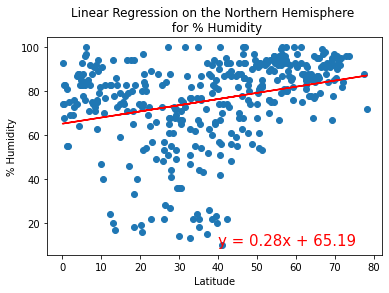

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title('Linear Regression on the Northern Hemisphere \n for % Humidity')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

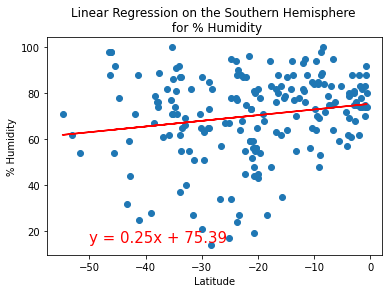

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title('Linear Regression on the Southern Hemisphere \n for % Humidity')
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

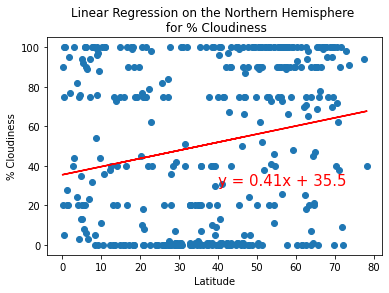

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title('Linear Regression on the Northern Hemisphere \n for % Cloudiness')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,30))

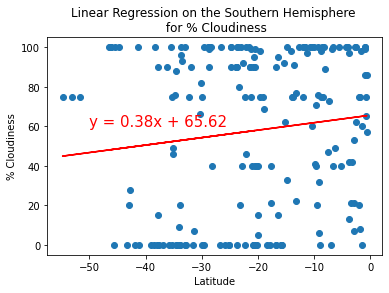

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title('Linear Regression on the Southern Hemisphere \n for % Cloudiness')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

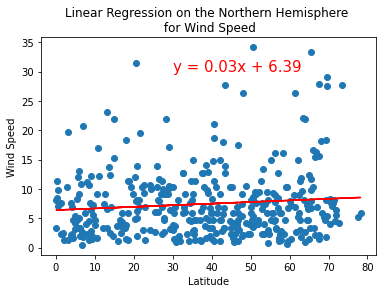

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title('Linear Regression on the Northern Hemisphere \n for Wind Speed')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(30,30))

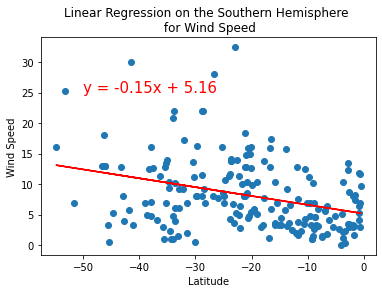

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title('Linear Regression on the Southern Hemisphere \n for Wind Speed')


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))